In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Task
Which teams scored the largest number of goals in FIFA World Cup?

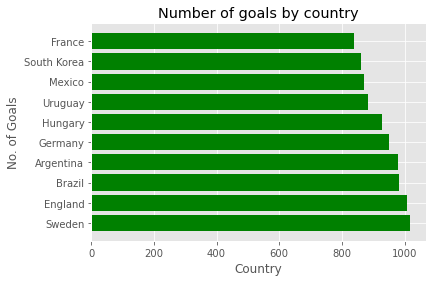

,country,home_score,away_score,total
5,Sweden,486,532,1018
4,England,498,511,1009
0,Brazil,568,413,981
1,Argentina,548,432,980
3,Germany,506,443,949
8,Hungary,453,475,928
25,Uruguay,343,541,884
2,Mexico,513,356,869
7,South Korea,468,394,862
6,France,484,356,840


In [3]:
df_filtered = df[df['tournament'] == 'FIFA World Cup']
df_filtered

df_home = df.loc[:, ['home_team', 'home_score']].rename(columns = {'home_team':'country', 'home_score':'home_score'}).groupby('country').count().sort_values('home_score', ascending=False)    

df_away = df.loc[:, ['away_team', 'away_score']].rename(columns = {'away_team':'country', 'away_score':'away_score'}).groupby('country').count().sort_values('away_score', ascending=False)
df_away

df_total = pd.merge(df_home, df_away, on='country', how='left')



df_total = df_total.fillna(0)
df_total['away_score'] = df_total['away_score'].astype(int)
reset_index = df_total.reset_index()
#reset_index = reset_index.loc[:, ['Manager', 'sale_cnt', 'sale_mean']]
reset_index
reset_index['total'] = reset_index['home_score'] + reset_index['away_score']
reset_index = reset_index.sort_values(by='total', ascending=False).head(10)

plt.style.use('ggplot')

plt.barh(reset_index['country'], reset_index['total'], color='green')
plt.xlabel("Country")
plt.ylabel("No. of Goals")
plt.title("Number of goals by country")



plt.show()
reset_index

## Task
What is the number of matches played in each tournament throughout history?

In [4]:
matches = df.loc[:, ['tournament', 'date']].groupby('tournament').count()

<AxesSubplot:ylabel='tournament'>

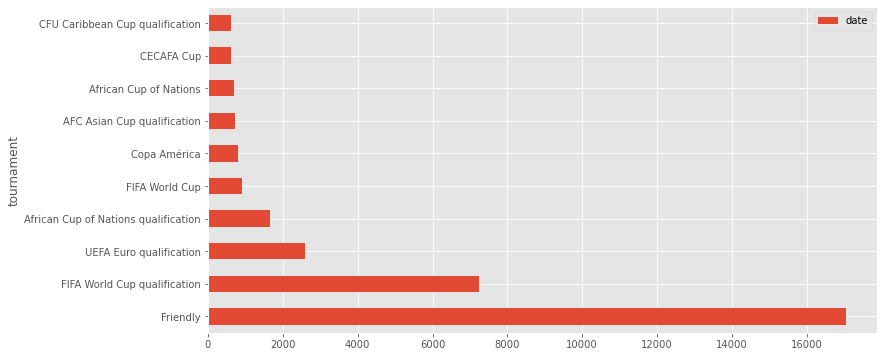

In [5]:
matches_df = df.loc[:, ['tournament', 'date']].groupby('tournament').count().sort_values(by='date', ascending=False).head(10)

matches_df.plot(kind ='barh', figsize=(12,6))

## Task 
Show the trend in number of matches per year.

<AxesSubplot:xlabel='year'>

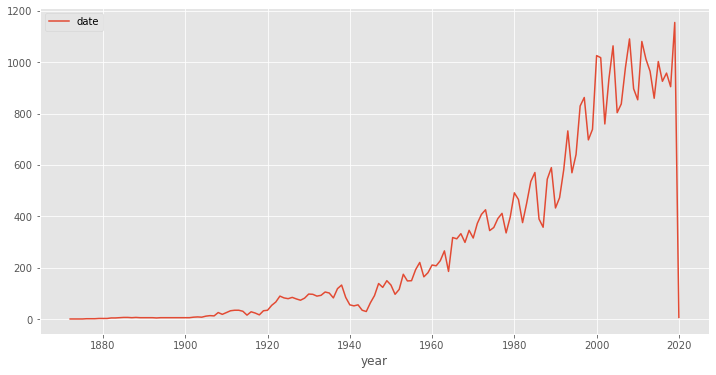

In [6]:
df['year'] = pd.DatetimeIndex(df['date']).year
year_df = df.loc[:, ['year', 'date']].groupby('year').count()

year_df.plot(figsize=(12,6))

## Task
Which teams are the most successful ones? (winning percentage)

In [7]:
df['winning_team'] = ''

df.loc[df['home_score'] > df['away_score'], 'winning_team'] = df['home_team'] 
df.loc[df['away_score'] > df['home_score'], 'winning_team'] = df['away_team'] 
df.loc[df['home_score'] == df['away_score'], 'winning_team'] = 'draw' 

#df_grouped = df.groupby('winning_team').count()
#df_grouped = df_grouped.reset_index()

df_winning_team = df.groupby('winning_team').count().sort_values(by='date', ascending=False).head(11)

df_winning_team.drop(['draw'], axis=0, inplace=True)

df_winning_team.reset_index(inplace=True)

df_winning_team

,winning_team,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,Brazil,625,625,625,625,625,625,625,625,625,625
1,England,572,572,572,572,572,572,572,572,572,572
2,Germany,555,555,555,555,555,555,555,555,555,555
3,Argentina,526,526,526,526,526,526,526,526,526,526
4,Sweden,500,500,500,500,500,500,500,500,500,500
5,South Korea,454,454,454,454,454,454,454,454,454,454
6,Mexico,439,439,439,439,439,439,439,439,439,439
7,Hungary,434,434,434,434,434,434,434,434,434,434
8,Italy,423,423,423,423,423,423,423,423,423,423
9,France,417,417,417,417,417,417,417,417,417,417


In [8]:
df_winning_team['away_score'] = df_winning_team['away_score'].astype(float)

df_winning_team['winning_percentage'] = (df_winning_team['away_score']/4945.0 * 100).round()

df_winning_team.sort_values(by='winning_percentage', ascending=False).head(10)

,winning_team,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winning_percentage
0,Brazil,625,625,625,625,625.0,625,625,625,625,625,13.0
1,England,572,572,572,572,572.0,572,572,572,572,572,12.0
2,Germany,555,555,555,555,555.0,555,555,555,555,555,11.0
3,Argentina,526,526,526,526,526.0,526,526,526,526,526,11.0
4,Sweden,500,500,500,500,500.0,500,500,500,500,500,10.0
5,South Korea,454,454,454,454,454.0,454,454,454,454,454,9.0
6,Mexico,439,439,439,439,439.0,439,439,439,439,439,9.0
7,Hungary,434,434,434,434,434.0,434,434,434,434,434,9.0
8,Italy,423,423,423,423,423.0,423,423,423,423,423,9.0
9,France,417,417,417,417,417.0,417,417,417,417,417,8.0


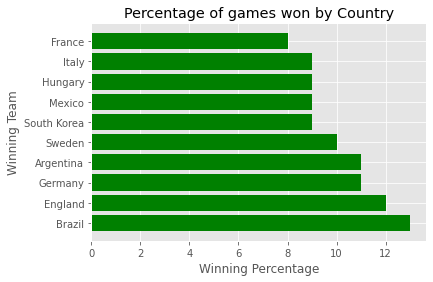

In [11]:
plt.barh(df_winning_team['winning_team'], df_winning_team['winning_percentage'], color='green')
plt.xlabel("Winning Percentage")
plt.ylabel("Winning Team")
plt.title("Percentage of games won by Country")

plt.show()